In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#df = pd.read_csv("/home/david/Documentos/Projects VS/Projeto dataviz/Projeto_DataViz/fipe_cars.csv")
df = pd.read_csv("https://raw.githubusercontent.com/DavidTitoInfantas/Projeto_DataViz/main/fipe_cars.csv")

In [3]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


In [4]:
df.isnull().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [5]:
df.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574504 entries, 0 to 574503
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   574504 non-null  int64  
 1   month_of_reference  574504 non-null  object 
 2   fipe_code           574504 non-null  object 
 3   authentication      574504 non-null  object 
 4   brand               574504 non-null  object 
 5   model               574504 non-null  object 
 6   fuel                574504 non-null  object 
 7   gear                574504 non-null  object 
 8   engine_size         574504 non-null  float64
 9   year_model          574504 non-null  int64  
 10  avg_price_brl       574504 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 48.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_reference,574504.0,2021.505262,0.499973,2021.0,2021.0,2022.0,2022.00,2022.0
engine_size,574504.0,2.266767,1.031866,0.7,1.6,2.0,2.80,6.7
year_model,574504.0,2008.738115,9.181865,1985.0,2001.0,2010.0,2016.00,2023.0
avg_price_brl,574504.0,110880.987382,288925.265262,1679.0,20064.0,42781.0,96412.25,8600000.0


In [8]:
pd.crosstab(df['brand'],[df['year_of_reference'],df['month_of_reference']],margins=True,margins_name='Total').sort_values(by='Total',ascending=False)

year_of_reference    2021                                                                                           2022                                                                                           Total
month_of_reference  April August December February January   July   June  March    May November October September  April August December February January   July   June  March    May November October September        
brand                                                                                                                                                                                                                   
Total               23472  23862    24013    23330   23289  23786  23729  23375  23557    23988   23942     23886  24024  24226    24364    24094   24031  24165  24123  24168  24057    24366   24333     24324  574504
VW - VolksWagen      2313   2333     2338     2303    2302   2334   2324   2312   2315     2338    2338      2333   2335   2345     2353     2343    2344   2344   2343   2343   2338     2349    2355      2350   56025
GM - Chevrolet       2281   2315     2326     2276    2277   2306   2301   2277   2284     2325    2327      2318   2324   2364     2365     2322    2325   2364   2358   2335   2327     2365    2365      2365   55792
Fiat                 2175   2201     2208     2181    2179   2198   2193   2172   2175     2208    2200      2200   2202   2196     2232     2214    2207   2196   2205   2214   2204     2233    2234      2226   52853
Ford                 1998   2005     2013     1998    1998   2004   2004   1998   2002     2010    2004      2004   2006   2011     2013     2019    2012   2012   2012   2021   2006     2013    2013      2012   48188
Mercedes-Benz        1424   1431     1430     1397    1393   1427   1430   1385   1428     1430    1430      1432   1446   1463     1471     1447    1433   1467   1449   1450   1449     1469    1464      1462   34507
Renault              1241   1249     1248     1218    1217   1243   1242   1236   1242     1246    1247      1247   1261   1275     1272     1248    1248   1275   1265   1269   1263     1271    1272      1275   30070
Audi                  967    972     1003      961     957    972    968    967    967      996     975       972   1001   1014     1034     1006    1002   1013   1011   1006   1003     1037    1019      1022   23845
Peugeot               895    911      915      898     897    904    899    897    897      916     912       912    921    934      938      918     915    930    923    918    921      938     939       937   21985
Toyota                841    844      853      818     818    843    843    834    841      843     844       844    860    852      856      874     852    853    865    874    864      853     853       853   20375
Mitsubishi            832    848      847      822     822    842    842    823    836      848     851       850    842    853      846      846     846    853    852    846    850      846     847       855   20245
BMW                   795    835      838      800     799    827    810    792    798      839     839       838    831    838      843      838     840    836    831    839    833      844     843       844   19870
Citroën               718    726      722      719     719    722    724    719    722      724     727       725    728    730      745      723     723    728    728    726    727      747     745       730   17447
Hyundai               573    610      630      574     574    610    610    575    587      631     631       619    605    627      631      630     630    616    610    630    611      631     629       635   14709
Nissan                571    578      583      568     568    574    574    567    574      585     581       577    573    570      573      582     584    570    569    580    566      574     573       571   13785
Land Rover            550    565      571      526     524    562    562    536    560      57

In [9]:
df.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size', 'year_model', 'avg_price_brl'], dtype='object')

In [10]:
df['date_of_reference'] = df['year_of_reference'].astype(str)+'-'+df['month_of_reference']

In [11]:
df['date_of_reference'] = pd.to_datetime(df['date_of_reference'],format="%Y-%B")

In [12]:
##df['date_of_reference'] = pd.to_datetime(df['date_of_reference']).dt.to_period('M')

In [13]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,date_of_reference
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0,2021-01-01
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0,2021-01-01
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0,2021-01-01
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0,2021-01-01
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0,2021-01-01


In [14]:
df.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size', 'year_model', 'avg_price_brl', 'date_of_reference'], dtype='object')

In [16]:
## Limpando colunas innecesarias
df_clean = df[['date_of_reference','brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl']]

In [17]:
df_clean.head()

,date_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021-01-01,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021-01-01,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021-01-01,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021-01-01,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021-01-01,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


In [18]:
df_data_mean_price = df_clean.groupby(['date_of_reference','brand']).avg_price_brl.mean().round(2).unstack(fill_value=0).reset_index()

In [20]:
## Dataset com preço medio por marca
df_data_mean_price.head()

brand,date_of_reference,AM Gen,ASTON MARTIN,Acura,Agrale,Alfa Romeo,Asia Motors,Audi,BMW,BRM,Baby,Buggy,CAB Motors,CBT Jipe,CHANA,CHANGAN,Cadillac,Caoa Chery,Chrysler,Citroën,Cross Lander,Daewoo,Daihatsu,Dodge,EFFA,Engesa,Envemo,FOTON,Ferrari,Fiat,Fibravan,Ford,Fyber,GEELY,GM - Chevrolet,GREAT WALL,HAFEI,Honda,Hyundai,IVECO,Isuzu,JAC,JINBEI,JPX,Jaguar,Jeep,Kia Motors,LIFAN,LOBINI,Lada,Land Rover,Lexus,Lotus,MG,MINI,Mahindra,Maserati,Matra,Mazda,Mclaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Peugeot,Plymouth,Pontiac,Porsche,RAM,RELY,Renault,Rolls-Royce,Rover,SHINERAY,SSANGYONG,Saab,Saturn,Seat,Subaru,Suzuki,TAC,Toyota,Troller,VW - VolksWagen,Volvo,Wake,Walk,smart
0,2021-01-01,193780.44,732812.90,23389.27,98287.59,24414.57,17236.63,125053.71,177498.23,15698.50,13823.13,3606.83,0.0,16195.75,11808.26,16941.00,43541.64,47677.82,31616.46,35724.58,28394.8,6492.33,9142.54,48369.45,25169.18,28079.42,22161.84,84267.41,1861592.36,29889.10,20704.59,35486.44,26415.21,24784.5,37630.10,32669.33,14611.75,49307.76,49578.64,144607.51,8105.73,54762.90,32490.44,12195.75,221657.53,93999.22,47320.52,40581.03,77305.25,6822.65,203166.01,168116.39,57860.5,53786.8,111239.96,36373.59,432325.98,17965.8,14633.12,2276150.00,180890.46,7737.67,62413.25,50048.96,31720.05,8531.17,26945.14,452398.88,273046.80,24462.78,35438.09,3025715.00,13875.67,34353.0,49863.76,12558.5,7966.5,7366.97,42094.46,42115.71,78451.5,66032.59,76582.83,31394.30,95275.54,38533.71,25825.36,36447.71
1,2021-02-01,193388.11,730304.60,23347.20,97952.53,24395.48,17227.47,126910.88,179218.27,15666.15,12330.91,0.00,0.0,16172.75,11754.71,16857.75,43459.64,48181.34,31710.53,35840.86,28331.4,6492.73,9145.00,48479.57,25385.79,28021.95,22131.58,84163.48,1887379.22,30182.35,20618.41,35642.76,26268.50,25188.0,37742.04,32585.00,14747.32,50123.96,49830.74,146671.16,8083.73,54847.84,32431.10,12165.00,222793.30,94639.90,47419.41,40802.67,77197.75,6855.19,204606.26,169329.59,57765.5,53597.4,111769.69,36342.36,445697.10,17971.8,14622.28,2275301.08,182683.89,7716.67,62852.30,50370.07,31902.56,8507.67,26894.57,451803.16,299868.17,24445.78,35670.61,3003624.22,13847.33,34236.0,50126.90,12523.0,7945.0,7340.97,43106.23,42709.82,79667.1,66489.77,76977.65,31570.06,98185.92,38301.88,25749.29,36405.04
2,2021-03-01,192996.56,728858.55,23305.20,97698.10,24511.48,17233.05,129094.52,177581.32,15632.60,12270.80,0.00,0.0,16149.75,11710.74,16818.00,43423.45,51511.83,31875.86,36071.52,28268.0,6471.64,9236.19,49004.65,25587.76,28136.26,22101.32,85969.70,1893280.14,30537.14,20525.61,36211.87,26123.96,25532.5,38310.62,32675.67,14873.43,51010.20,50742.30,148569.98,8061.73,57336.73,32531.33,12134.25,228319.24,96089.22,47717.16,40937.73,77063.50,6846.38,211166.02,172332.39,57671.0,54137.4,112534.17,36303.59,446590.28,17927.9,14644.78,2261597.04,186396.69,7695.67,63825.83,50907.20,32046.20,8484.17,26844.14,461382.86,299800.00,24399.33,36843.06,2984770.89,13819.00,34119.0,50179.32,12487.5,7923.5,7289.47,43484.60,43339.42,80153.6,68281.35,77778.65,32065.77,99337.16,38074.12,25736.36,37018.18
3,2021-04-01,192605.67,726593.10,23263.33,103816.60,24664.71,17207.21,131378.13,182793.75,15599.46,12226.64,0.00,0.0,16126.75,11652.06,17146.25,43505.09,52308.27,32402.48,36539.45,28205.4,6442.45,9254.38,50419.43,26406.18,28094.11,22071.26,85916.22,1946695.87,31456.57,20448.06,36847.21,25981.62,26695.5,39579.58,32796.67,15450.00,52395.14,52305.44,150638.49,8039.73,57819.92,32586.33,12103.50,227936.33,97877.93,48497.70,41378.30,76929.50,6835.15,225757.51,177008.89,57576.5,56018.2,116070.37,36418.55,447092.28,17884.3,14685.97,2268771.48,197486.44,7674.67,66663.51,52755.61,32693.58,8460.67,26794.00,475237.51,304343.58,24622.78,37823.38,2966765.11,13790.67,34002.5,50316.88,12452.0,7902.0,7290.83,43963.00,44379.77,79872.2,70985.37,83767.32,33024.21,99361.59,37849.71,25661.21,38272.89
4,2021-05-01,192219.67,726320.60,23221.67,119013.29,24907.10,17227.58,132538.69,186137.20,15677.33,12189.07,0.00,0.0,16103.88,11605.77,17313.75,43970.82,53065.38,32798.

In [21]:
columns_brand = list(df_data_mean_price.columns)
brand_removes = ['date_of_reference','Buggy','CAB Motors'] ## Removemos marcas que não tem dados em mais do 50% do periodo
columns_brand = list(filter(lambda x: x not in brand_removes,columns_brand))
#columns_brand.remove('date_of_reference','Buggy','CAB Motors')

In [22]:
columns_variacao = []
for i in columns_brand:
    variacao_brand = f'variacao_{i}_%'
    df_data_mean_price[variacao_brand] = round(((df_data_mean_price[i].diff()/df_data_mean_price[i]))*100,2)
    columns_variacao.append(variacao_brand)
#columns_variacao.remove('variacao_date_of_reference')

In [23]:
df_variacao = df_data_mean_price[columns_variacao]

In [48]:
##Dataset com variação mensual do mes anterior por marca
df_variacao

brand,variacao_AM Gen_%,variacao_ASTON MARTIN_%,variacao_Acura_%,variacao_Agrale_%,variacao_Alfa Romeo_%,variacao_Asia Motors_%,variacao_Audi_%,variacao_BMW_%,variacao_BRM_%,variacao_Baby_%,variacao_CBT Jipe_%,variacao_CHANA_%,variacao_CHANGAN_%,variacao_Cadillac_%,variacao_Caoa Chery_%,variacao_Chrysler_%,variacao_Citroën_%,variacao_Cross Lander_%,variacao_Daewoo_%,variacao_Daihatsu_%,variacao_Dodge_%,variacao_EFFA_%,variacao_Engesa_%,variacao_Envemo_%,variacao_FOTON_%,variacao_Ferrari_%,variacao_Fiat_%,variacao_Fibravan_%,variacao_Ford_%,variacao_Fyber_%,variacao_GEELY_%,variacao_GM - Chevrolet_%,variacao_GREAT WALL_%,variacao_HAFEI_%,variacao_Honda_%,variacao_Hyundai_%,variacao_IVECO_%,variacao_Isuzu_%,variacao_JAC_%,variacao_JINBEI_%,variacao_JPX_%,variacao_Jaguar_%,variacao_Jeep_%,variacao_Kia Motors_%,variacao_LIFAN_%,variacao_LOBINI_%,variacao_Lada_%,variacao_Land Rover_%,variacao_Lexus_%,variacao_Lotus_%,variacao_MG_%,variacao_MINI_%,variacao_Mahindra_%,variacao_Maserati_%,variacao_Matra_%,variacao_Mazda_%,variacao_Mclaren_%,variacao_Mercedes-Benz_%,variacao_Mercury_%,variacao_Mitsubishi_%,variacao_Nissan_%,variacao_Peugeot_%,variacao_Plymouth_%,variacao_Pontiac_%,variacao_Porsche_%,variacao_RAM_%,variacao_RELY_%,variacao_Renault_%,variacao_Rolls-Royce_%,variacao_Rover_%,variacao_SHINERAY_%,variacao_SSANGYONG_%,variacao_Saab_%,variacao_Saturn_%,variacao_Seat_%,variacao_Subaru_%,variacao_Suzuki_%,variacao_TAC_%,variacao_Toyota_%,variacao_Troller_%,variacao_VW - VolksWagen_%,variacao_Volvo_%,variacao_Wake_%,variacao_Walk_%,variacao_smart_%,Mean_ABS_variacao_bands,Mean_variacao_bands
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
1,-0.20,-0.34,-0.18,-0.34,-0.08,-0.05,1.46,0.96,-0.21,-12.10,-0.14,-0.46,-0.49,-0.19,1.05,0.30,0.32,-0.22,0.01,0.03,0.23,0.85,-0.21,-0.14,-0.12,1.37,0.97,-0.42,0.44,-0.56,1.60,0.30,-0.26,0.92,1.63,0.51,1.41,-0.27,0.15,-0.18,-0.25,0.51,0.68,0.21,0.54,-0.14,0.47,0.70,0.72,-0.16,-0.35,0.47,-0.09,3.00,0.03,-0.07,-0.04,0.98,-0.27,0.70,0.64,0.57,-0.28,-0.19,-0.13,8.94,-0.07,0.65,-0.74,-0.20,-0.34,0.52,-0.28,-0.27,-0.35,2.35,1.39,1.53,0.69,0.51,0.56,2.96,-0.61,-0.30,-0.12,67.24,22.42
2,-0.20,-0.20,-0.18,-0.26,0.47,0.03,1.69,-0.92,-0.21,-0.49,-0.14,-0.38,-0.24,-0.08,6.47,0.52,0.64,-0.22,-0.33,0.99,1.07,0.79,0.41,-0.14,2.10,0.31,1.16,-0.45,1.57,-0.55,1.35,1.48,0.28,0.85,1.74,1.80,1.28,-0.27,4.34,0.31,-0.25,2.42,1.51,0.62,0.33,-0.17,-0.13,3.11,1.74,-0.16,1.00,0.68,-0.11,0.20,-0.24,0.15,-0.61,1.99,-0.27,1.53,1.06,0.45,-0.28,-0.19,2.08,-0.02,-0.19,3.18,-0.63,-0.21,-0.34,0.10,-0.28,-0.27,-0.71,0.87,1.45,0.61,2.62,1.03,1.55,1.16,-0.60,-0.05,1.66,75.72,53.78
3,-0.20,-0.31,-0.18,5.89,0.62,-0.15,1.74,2.85,-0.21,-0.36,-0.14,-0.50,1.91,0.19,1.52,1.63,1.28,-0.22,-0.45,0.20,2.81,3.10,-0.15,-0.14,-0.06,2.74,2.92,-0.38,1.72,-0.55,4.36,3.21,0.37,3.73,2.64,2.99,1.37,-0.27,0.84,0.17,-0.25,-0.17,1.83,1.61,1.06,-0.17,-0.16,6.46,2.64,-0.16,3.36,3.05,0.32,0.11,-0.24,0.28,0.32,5.62,-0.27,4.26,3.50,1.98,-0.28,-0.19,2.92,1.49,0.91,2.59,-0.61,-0.21,-0.34,0.27,-0.29,-0.27,0.02,1.09,2.34,-0.35,3.81,7.15,2.90,0.02,-0.59,-0.29,3.28,125.10,106.88
4,-0.20,-0.04,-0.18,12.77,0.97,0.12,0.88,1.80,0.50,-0.31,-0.14,-0.40,0.97,1.06,1.43,1.21,1.72,-0.22,-0.29,0.31,1.04,0.08,-0.15,-0.14,0.15,-1.49,1.19,-0.05,2.50,-0.54,1.15,1.54,3.64,0.27,1.08,1.76,0.52,-0.27,0.55,0.15,-0.25,1.32,2.48,0.69,0.19,-0.17,0.49,3.44,0.98,-0.16,0.52,1.04,0.64,0.11,-0.24,0.46,10.47,0.78,-0.27,2.05,-1.22,1.09,-0.28,-0.19,0.99,3.44,-0.23,1.23,-0.54,-0.21,-0.34,-0.00,-0.29,-0.27,-0.12,0.37,1.45,-0.03,1.26,10.80,1.16,0.70,-0.35,-0.29,2.71,100.09,80.35
5,23.47,1.65,1.47,1.75,3.13,1.67,3.19,5.65,1.47,1.25,1.46,2.00,2.84,1.48,4.45,3.43,2.71,1.48,1.42,1.12,3.11,2.07,1.46,1.46,1

In [33]:
df_variacao['Mean_ABS_variacao_bands'] = df_variacao[columns_variacao].abs().sum(axis=1)
df_variacao['Mean_variacao_bands'] = df_variacao[columns_variacao].sum(axis=1)

/tmp/ipykernel_95495/3049594999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variacao['Mean_ABS_variacao_bands'] = df_variacao[columns_variacao].abs().sum(axis=1)
/tmp/ipykernel_95495/3049594999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variacao['Mean_variacao_bands'] = df_variacao[columns_variacao].sum(axis=1)


In [34]:
df_variacao_all = pd.DataFrame({'date_of_reference':df_data_mean_price['date_of_reference'],
                                'Mean_ABS_variacao_bands':df_variacao['Mean_ABS_variacao_bands'],
                                'Mean_variacao_bands':df_variacao['Mean_variacao_bands']
                                })
                                #.set_index('date_of_reference')

In [30]:
df_variacao_all = pd.DataFrame({'date_of_reference':df_data_mean_price['date_of_reference'],
                                'Mean_variacao_bands':df_variacao['Mean_variacao_bands']})
                                #.set_index('date_of_reference')

In [35]:
df_variacao_all

,date_of_reference,Mean_ABS_variacao_bands,Mean_variacao_bands
0,2021-01-01,0.00,0.00
1,2021-02-01,67.24,22.42
2,2021-03-01,75.72,53.78
3,2021-04-01,125.10,106.88
4,2021-05-01,100.09,80.35
5,2021-06-01,263.63,263.63
6,2021-07-01,179.22,174.22
7,2021-08-01,237.41,231.33
8,2021-09-01,200.01,198.05
9,2021-10-01,179.81,178.33


In [60]:
def plotar(title,xlabel,ylabel, x, y,df):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data = df)
    ##as1= sns.lineplot(x=x, y=y1, data = df)
    ax.figure.set_size_inches(10,5)
    ax.set_title(title,loc = 'left', fontsize=18)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)

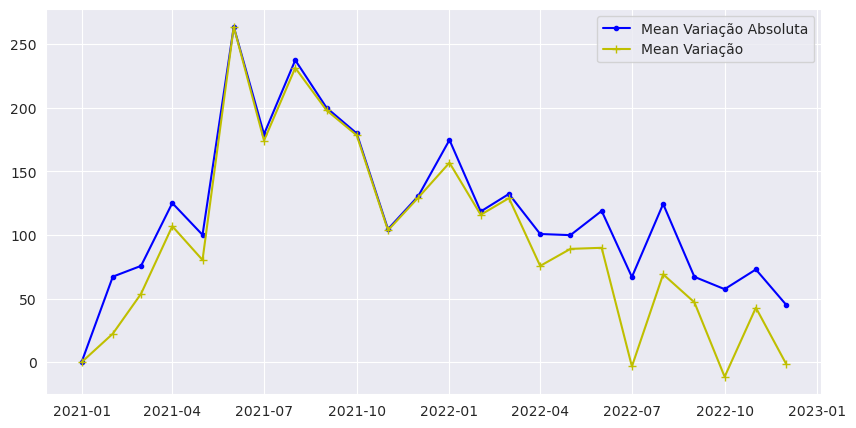

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df_variacao_all['date_of_reference'],df_variacao_all['Mean_ABS_variacao_bands'],marker='.', color='b', label= 'Mean Variação Absoluta')
plt.plot(df_variacao_all['date_of_reference'],df_variacao_all['Mean_variacao_bands'], marker = '+', color = 'y',label = 'Mean Variação')
plt.legend();

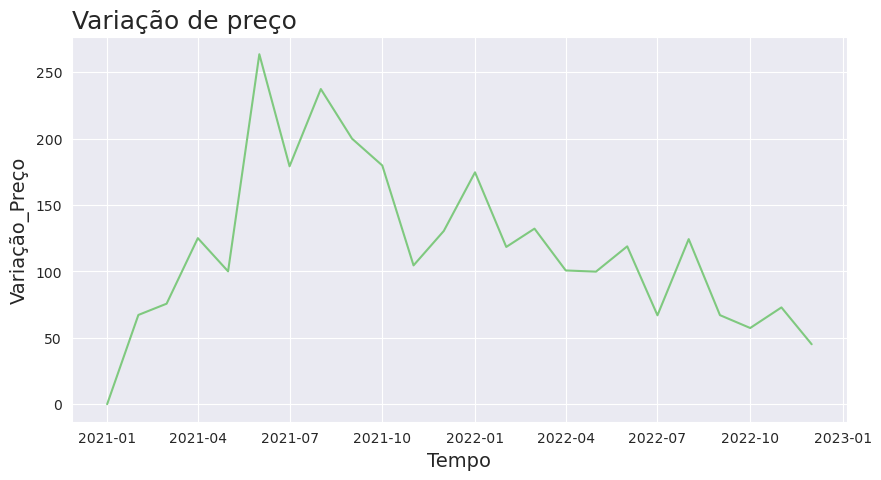

In [61]:
# Variacion por mes na lista FIPE

plotar('Variação de preço','Tempo','Variação_Preço','date_of_reference','Mean_ABS_variacao_bands',df_variacao_all)

In [88]:
df_variacao_only_brand = df_variacao.drop(columns={'Mean_variacao_bands','Mean_ABS_variacao_bands'})

In [89]:
df_variacao_only_brand.head()

brand,variacao_AM Gen_%,variacao_ASTON MARTIN_%,variacao_Acura_%,variacao_Agrale_%,variacao_Alfa Romeo_%,variacao_Asia Motors_%,variacao_Audi_%,variacao_BMW_%,variacao_BRM_%,variacao_Baby_%,variacao_CBT Jipe_%,variacao_CHANA_%,variacao_CHANGAN_%,variacao_Cadillac_%,variacao_Caoa Chery_%,variacao_Chrysler_%,variacao_Citroën_%,variacao_Cross Lander_%,variacao_Daewoo_%,variacao_Daihatsu_%,variacao_Dodge_%,variacao_EFFA_%,variacao_Engesa_%,variacao_Envemo_%,variacao_FOTON_%,variacao_Ferrari_%,variacao_Fiat_%,variacao_Fibravan_%,variacao_Ford_%,variacao_Fyber_%,variacao_GEELY_%,variacao_GM - Chevrolet_%,variacao_GREAT WALL_%,variacao_HAFEI_%,variacao_Honda_%,variacao_Hyundai_%,variacao_IVECO_%,variacao_Isuzu_%,variacao_JAC_%,variacao_JINBEI_%,variacao_JPX_%,variacao_Jaguar_%,variacao_Jeep_%,variacao_Kia Motors_%,variacao_LIFAN_%,variacao_LOBINI_%,variacao_Lada_%,variacao_Land Rover_%,variacao_Lexus_%,variacao_Lotus_%,variacao_MG_%,variacao_MINI_%,variacao_Mahindra_%,variacao_Maserati_%,variacao_Matra_%,variacao_Mazda_%,variacao_Mclaren_%,variacao_Mercedes-Benz_%,variacao_Mercury_%,variacao_Mitsubishi_%,variacao_Nissan_%,variacao_Peugeot_%,variacao_Plymouth_%,variacao_Pontiac_%,variacao_Porsche_%,variacao_RAM_%,variacao_RELY_%,variacao_Renault_%,variacao_Rolls-Royce_%,variacao_Rover_%,variacao_SHINERAY_%,variacao_SSANGYONG_%,variacao_Saab_%,variacao_Saturn_%,variacao_Seat_%,variacao_Subaru_%,variacao_Suzuki_%,variacao_TAC_%,variacao_Toyota_%,variacao_Troller_%,variacao_VW - VolksWagen_%,variacao_Volvo_%,variacao_Wake_%,variacao_Walk_%,variacao_smart_%
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.2,-0.34,-0.18,-0.34,-0.08,-0.05,1.46,0.96,-0.21,-12.10,-0.14,-0.46,-0.49,-0.19,1.05,0.30,0.32,-0.22,0.01,0.03,0.23,0.85,-0.21,-0.14,-0.12,1.37,0.97,-0.42,0.44,-0.56,1.60,0.30,-0.26,0.92,1.63,0.51,1.41,-0.27,0.15,-0.18,-0.25,0.51,0.68,0.21,0.54,-0.14,0.47,0.70,0.72,-0.16,-0.35,0.47,-0.09,3.00,0.03,-0.07,-0.04,0.98,-0.27,0.70,0.64,0.57,-0.28,-0.19,-0.13,8.94,-0.07,0.65,-0.74,-0.20,-0.34,0.52,-0.28,-0.27,-0.35,2.35,1.39,1.53,0.69,0.51,0.56,2.96,-0.61,-0.30,-0.12
2,-0.2,-0.20,-0.18,-0.26,0.47,0.03,1.69,-0.92,-0.21,-0.49,-0.14,-0.38,-0.24,-0.08,6.47,0.52,0.64,-0.22,-0.33,0.99,1.07,0.79,0.41,-0.14,2.10,0.31,1.16,-0.45,1.57,-0.55,1.35,1.48,0.28,0.85,1.74,1.80,1.28,-0.27,4.34,0.31,-0.25,2.42,1.51,0.62,0.33,-0.17,-0.13,3.11,1.74,-0.16,1.00,0.68,-0.11,0.20,-0.24,0.15,-0.61,1.99,-0.27,1.53,1.06,0.45,-0.28,-0.19,2.08,-0.02,-0.19,3.18,-0.63,-0.21,-0.34,0.10,-0.28,-0.27,-0.71,0.87,1.45,0.61,2.62,1.03,1.55,1.16,-0.60,-0.05,1.66
3,-0.2,-0.31,-0.18,5.89,0.62,-0.15,1.74,2.85,-0.21,-0.36,-0.14,-0.50,1.91,0.19,1.52,1.63,1.28,-0.22,-0.45,0.20,2.81,3.10,-0.15,-0.14,-0.06,2.74,2.92,-0.38,1.72,-0.55,4.36,3.21,0.37,3.73,2.64,2.99,1.37,-0.27,0.84,0.17,-0.25,-0.17,1.83,1.61,1.06,-0.17,-0.16,6.46,2.64,-0.16,3.36,3.05,0.32,0.11,-0.24,0.28,0.32,5.62,-0.27,4.26,3.50,1.98,-0.28,-0.19,2.92,1.49,0.91,2.59,-0.61,-0.21,-0.34,0.27,-0.29,-0.27,0.02,1.09,2.34,-0.35,3.81,7.15,2.90,0.02,-0.59,-0.29,3.28
4,-0.2,-0.04,-0.18,12.77,0.97,0.12,0.88,1.80,0.50,-0.31,-0.14,-0.40,0.97,1.06,1.43,1.21,1.72,-0.22,-0.29,0.31,1.04,0.08,-0.15,-0.14,0.15,-1.49,1.19,-0.05,2.50,-0.54,1.15,1.54,3.64,0.27,1.08,1.76,0.52,-0.27,0.55,0.15,-0.25,1.32,2.48,0.69,0.19,-0.17,0.49,3.44,0.98,-0.16,0.52,1.04,0.64,0.11,-0.24,0.46,10.47,0.78,-0.27,2.05,-1.22,1.09,-0.28,-0.19,0.99,3.44,-0.23,1.23,-0.54,-0.21,-0.34,-0.00,-0.29,-0.27,-0.12,0.37,1.45,-0.03,1.26,10.80,1.16,0.70,-0.35,-0.29,2.71


In [90]:
df_variacao_only_brand.T.index

Index(['variacao_AM Gen_%', 'variacao_ASTON MARTIN_%', 'variacao_Acura_%', 'variacao_Agrale_%', 'variacao_Alfa Romeo_%', 'variacao_Asia Motors_%', 'variacao_Audi_%', 'variacao_BMW_%', 'variacao_BRM_%', 'variacao_Baby_%', 'variacao_CBT Jipe_%', 'variacao_CHANA_%', 'variacao_CHANGAN_%', 'variacao_Cadillac_%', 'variacao_Caoa Chery_%', 'variacao_Chrysler_%', 'variacao_Citroën_%', 'variacao_Cross Lander_%', 'variacao_Daewoo_%', 'variacao_Daihatsu_%', 'variacao_Dodge_%', 'variacao_EFFA_%', 'variacao_Engesa_%', 'variacao_Envemo_%', 'variacao_FOTON_%', 'variacao_Ferrari_%', 'variacao_Fiat_%', 'variacao_Fibravan_%', 'variacao_Ford_%', 'variacao_Fyber_%', 'variacao_GEELY_%', 'variacao_GM - Chevrolet_%', 'variacao_GREAT WALL_%', 'variacao_HAFEI_%', 'variacao_Honda_%', 'variacao_Hyundai_%', 'variacao_IVECO_%', 'variacao_Isuzu_%', 'variacao_JAC_%', 'variacao_JINBEI_%', 'variacao_JPX_%', 'variacao_Jaguar_%', 'variacao_Jeep_%', 'variacao_Kia Motors_%', 'variacao_LIFAN_%', 'variacao_LOBINI_%',
       

In [109]:
brand_variacao_all_period = df_variacao_only_brand.T.sum(axis=1)
brand_variacao_all_period = pd.DataFrame(brand_variacao_all_period,columns={'Variacao'}).sort_values(by='Variacao',ascending=False)
brand_variacao_all_period['Brands'] = brand_variacao_all_period.index
brand_variacao_all_period.reset_index(drop=True,inplace=True)

In [112]:
brand_variacao_all_period.head()

,Variacao,Brands
0,69.47,variacao_AM Gen_%
1,68.35,variacao_Wake_%
2,58.09,variacao_Ferrari_%
3,51.80,variacao_Alfa Romeo_%
4,49.81,variacao_smart_%


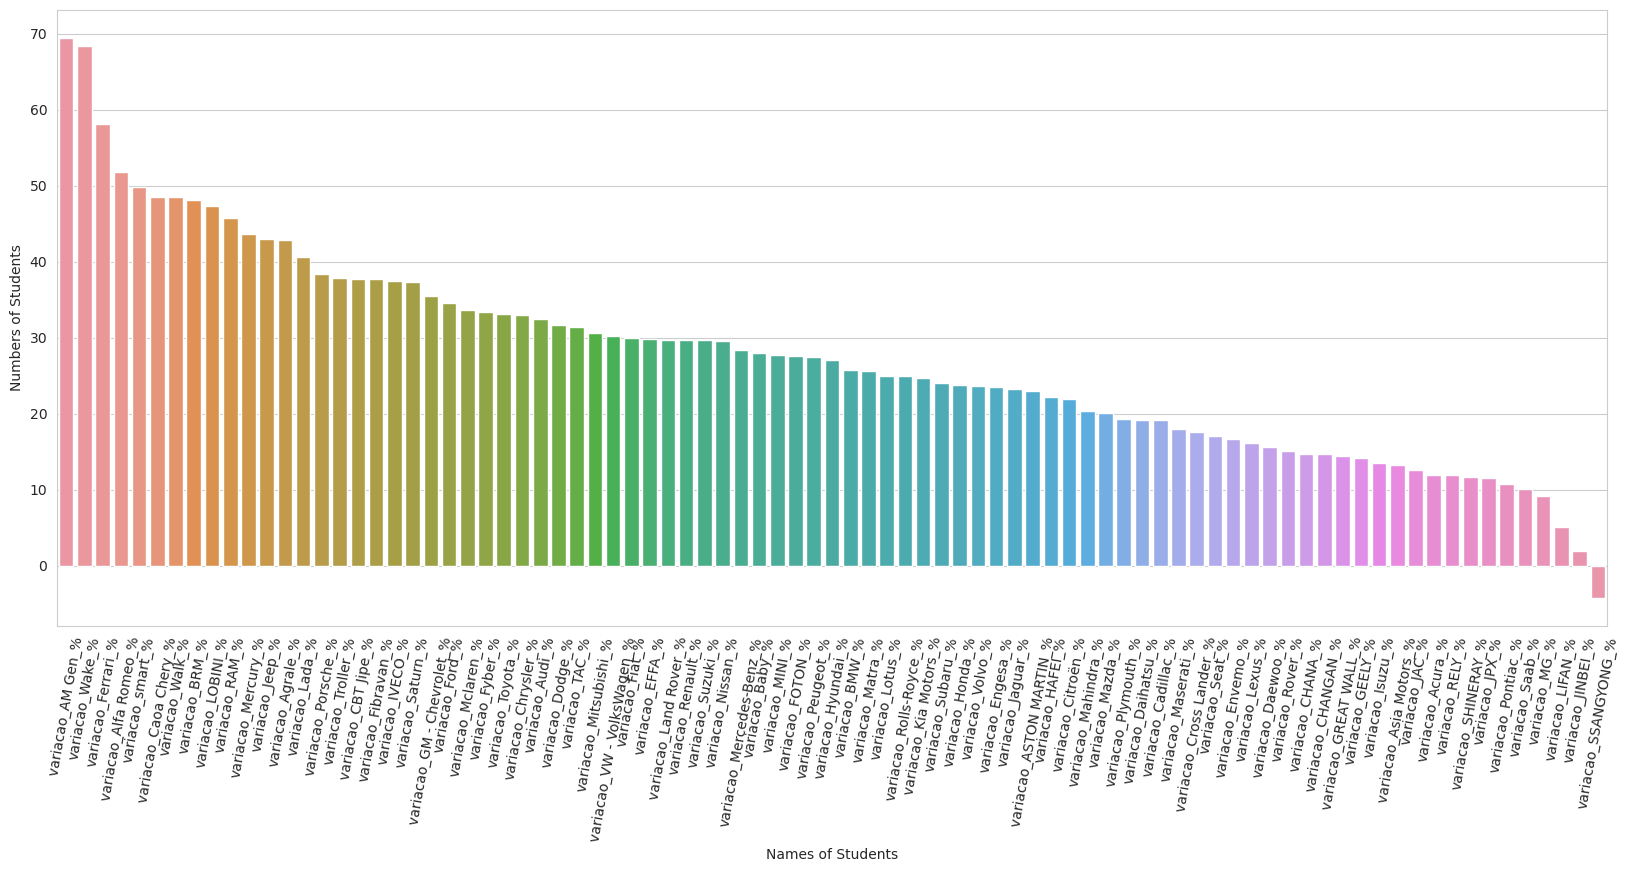

In [127]:
plt.figure(figsize=(20,8))
sns.barplot(x = "Brands", y = "Variacao", data = brand_variacao_all_period)
#plt.yticks(rotation=90)
plt.xticks(rotation=80)
plt.xlabel("Names of Students")
plt.ylabel("Numbers of Students")
plt.show()

In [128]:
# 10 melhores marcas para analisar
brand_variacao_all_period.head(10)

,Variacao,Brands
0,69.47,variacao_AM Gen_%
1,68.35,variacao_Wake_%
2,58.09,variacao_Ferrari_%
3,51.80,variacao_Alfa Romeo_%
4,49.81,variacao_smart_%
5,48.58,variacao_Caoa Chery_%
6,48.51,variacao_Walk_%
7,48.09,variacao_BRM_%
8,47.38,variacao_LOBINI_%
9,45.71,variacao_RAM_%


In [77]:
## Analise das variações por marca
variacao_by_brand = pd.concat([df_data_mean_price['date_of_reference'],df_variacao_only_brand], axis=1)

In [78]:
variacao_by_brand

,date_of_reference,variacao_AM Gen_%,variacao_ASTON MARTIN_%,variacao_Acura_%,variacao_Agrale_%,variacao_Alfa Romeo_%,variacao_Asia Motors_%,variacao_Audi_%,variacao_BMW_%,variacao_BRM_%,variacao_Baby_%,variacao_CBT Jipe_%,variacao_CHANA_%,variacao_CHANGAN_%,variacao_Cadillac_%,variacao_Caoa Chery_%,variacao_Chrysler_%,variacao_Citroën_%,variacao_Cross Lander_%,variacao_Daewoo_%,variacao_Daihatsu_%,variacao_Dodge_%,variacao_EFFA_%,variacao_Engesa_%,variacao_Envemo_%,variacao_FOTON_%,variacao_Ferrari_%,variacao_Fiat_%,variacao_Fibravan_%,variacao_Ford_%,variacao_Fyber_%,variacao_GEELY_%,variacao_GM - Chevrolet_%,variacao_GREAT WALL_%,variacao_HAFEI_%,variacao_Honda_%,variacao_Hyundai_%,variacao_IVECO_%,variacao_Isuzu_%,variacao_JAC_%,variacao_JINBEI_%,variacao_JPX_%,variacao_Jaguar_%,variacao_Jeep_%,variacao_Kia Motors_%,variacao_LIFAN_%,variacao_LOBINI_%,variacao_Lada_%,variacao_Land Rover_%,variacao_Lexus_%,variacao_Lotus_%,variacao_MG_%,variacao_MINI_%,variacao_Mahindra_%,variacao_Maserati_%,variacao_Matra_%,variacao_Mazda_%,variacao_Mclaren_%,variacao_Mercedes-Benz_%,variacao_Mercury_%,variacao_Mitsubishi_%,variacao_Nissan_%,variacao_Peugeot_%,variacao_Plymouth_%,variacao_Pontiac_%,variacao_Porsche_%,variacao_RAM_%,variacao_RELY_%,variacao_Renault_%,variacao_Rolls-Royce_%,variacao_Rover_%,variacao_SHINERAY_%,variacao_SSANGYONG_%,variacao_Saab_%,variacao_Saturn_%,variacao_Seat_%,variacao_Subaru_%,variacao_Suzuki_%,variacao_TAC_%,variacao_Toyota_%,variacao_Troller_%,variacao_VW - VolksWagen_%,variacao_Volvo_%,variacao_Wake_%,variacao_Walk_%,variacao_smart_%,Mean_variacao_bands
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,2021-02-01,-0.20,-0.34,-0.18,-0.34,-0.08,-0.05,1.46,0.96,-0.21,-12.10,-0.14,-0.46,-0.49,-0.19,1.05,0.30,0.32,-0.22,0.01,0.03,0.23,0.85,-0.21,-0.14,-0.12,1.37,0.97,-0.42,0.44,-0.56,1.60,0.30,-0.26,0.92,1.63,0.51,1.41,-0.27,0.15,-0.18,-0.25,0.51,0.68,0.21,0.54,-0.14,0.47,0.70,0.72,-0.16,-0.35,0.47,-0.09,3.00,0.03,-0.07,-0.04,0.98,-0.27,0.70,0.64,0.57,-0.28,-0.19,-0.13,8.94,-0.07,0.65,-0.74,-0.20,-0.34,0.52,-0.28,-0.27,-0.35,2.35,1.39,1.53,0.69,0.51,0.56,2.96,-0.61,-0.30,-0.12,22.42
2,2021-03-01,-0.20,-0.20,-0.18,-0.26,0.47,0.03,1.69,-0.92,-0.21,-0.49,-0.14,-0.38,-0.24,-0.08,6.47,0.52,0.64,-0.22,-0.33,0.99,1.07,0.79,0.41,-0.14,2.10,0.31,1.16,-0.45,1.57,-0.55,1.35,1.48,0.28,0.85,1.74,1.80,1.28,-0.27,4.34,0.31,-0.25,2.42,1.51,0.62,0.33,-0.17,-0.13,3.11,1.74,-0.16,1.00,0.68,-0.11,0.20,-0.24,0.15,-0.61,1.99,-0.27,1.53,1.06,0.45,-0.28,-0.19,2.08,-0.02,-0.19,3.18,-0.63,-0.21,-0.34,0.10,-0.28,-0.27,-0.71,0.87,1.45,0.61,2.62,1.03,1.55,1.16,-0.60,-0.05,1.66,53.78
3,2021-04-01,-0.20,-0.31,-0.18,5.89,0.62,-0.15,1.74,2.85,-0.21,-0.36,-0.14,-0.50,1.91,0.19,1.52,1.63,1.28,-0.22,-0.45,0.20,2.81,3.10,-0.15,-0.14,-0.06,2.74,2.92,-0.38,1.72,-0.55,4.36,3.21,0.37,3.73,2.64,2.99,1.37,-0.27,0.84,0.17,-0.25,-0.17,1.83,1.61,1.06,-0.17,-0.16,6.46,2.64,-0.16,3.36,3.05,0.32,0.11,-0.24,0.28,0.32,5.62,-0.27,4.26,3.50,1.98,-0.28,-0.19,2.92,1.49,0.91,2.59,-0.61,-0.21,-0.34,0.27,-0.29,-0.27,0.02,1.09,2.34,-0.35,3.81,7.15,2.90,0.02,-0.59,-0.29,3.28,106.88
4,2021-05-01,-0.20,-0.04,-0.18,12.77,0.97,0.12,0.88,1.80,0.50,-0.31,-0.14,-0.40,0.97,1.06,1.43,1.21,1.72,-0.22,-0.29,0.31,1.04,0.08,-0.15,-0.14,0.15,-1.49,1.19,-0.05,2.50,-0.54,1.15,1.54,3.64,0.27,1.08,1.76,0.52,-0.27,0.55,0.15,-0.25,1.32,2.48,0.69,0.19,-0.17,0.49,3.44,0.98,-0.16,0.52,1.04,0.64,0.11,-0.24,0.46,10.47,0.78,-0.27,2.05,-1.22,1.09,-0.28,-0.19,0.99,3.44,-0.23,1.23,-0.54,-0.21,-0.34,-0.00,-0.29,-0.27,-0.12,0.37,1.45,-0.03,1.26,10.80,1.16,0.70,-0.35,-0.29,2.71,80.35
5,2021-06-01,23.47,1.65,1.47,1.75,3.13,1.67,3.19,5.65,1.47,1.25,1.46,2.00,2.84,1.48,4.45,3.43,2.71,1.48,1.42,1.

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

Text(0, 0.5, 'variacao_ASTON MARTIN_%')

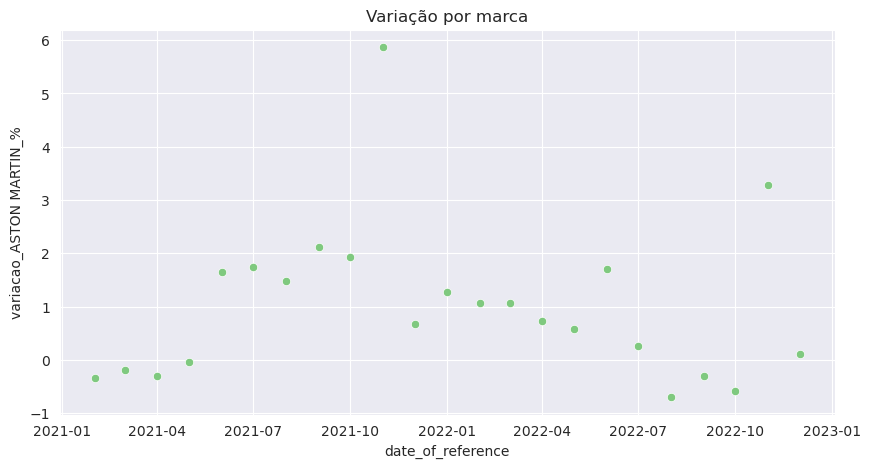

In [67]:

plt.figure(figsize=(10,5))
#sns.set_style("whitegrid")
p1 = sns.scatterplot(data=variacao_by_brand, x="date_of_reference", y="variacao_ASTON MARTIN_%") ##,sizes=(100,100)
plt.title("Variação por marca")
plt.xlabel("date_of_reference")
plt.ylabel("variacao_ASTON MARTIN_%")
##p1

In [68]:
full_df = []
for i in variacao_by_brand.columns:
    if i != "date_of_reference":
        df = pd.DataFrame({"date_of_reference":variacao_by_brand["date_of_reference"],
                        "Variacao":variacao_by_brand[i],
                        "Brand":i.split("_")[1]})
        if len(full_df) == 0:
            full_df = df
        else:
            full_df = pd.concat([full_df,df],axis=0).reset_index(drop=True)
    
    #full_df.reset_index()

In [72]:
full_df.head()

,date_of_reference,Variacao,Brand
0,2021-01-01,NaN,AM Gen
1,2021-02-01,-0.2,AM Gen
2,2021-03-01,-0.2,AM Gen
3,2021-04-01,-0.2,AM Gen
4,2021-05-01,-0.2,AM Gen


Text(0, 0.5, 'variacao_ASTON MARTIN_%')

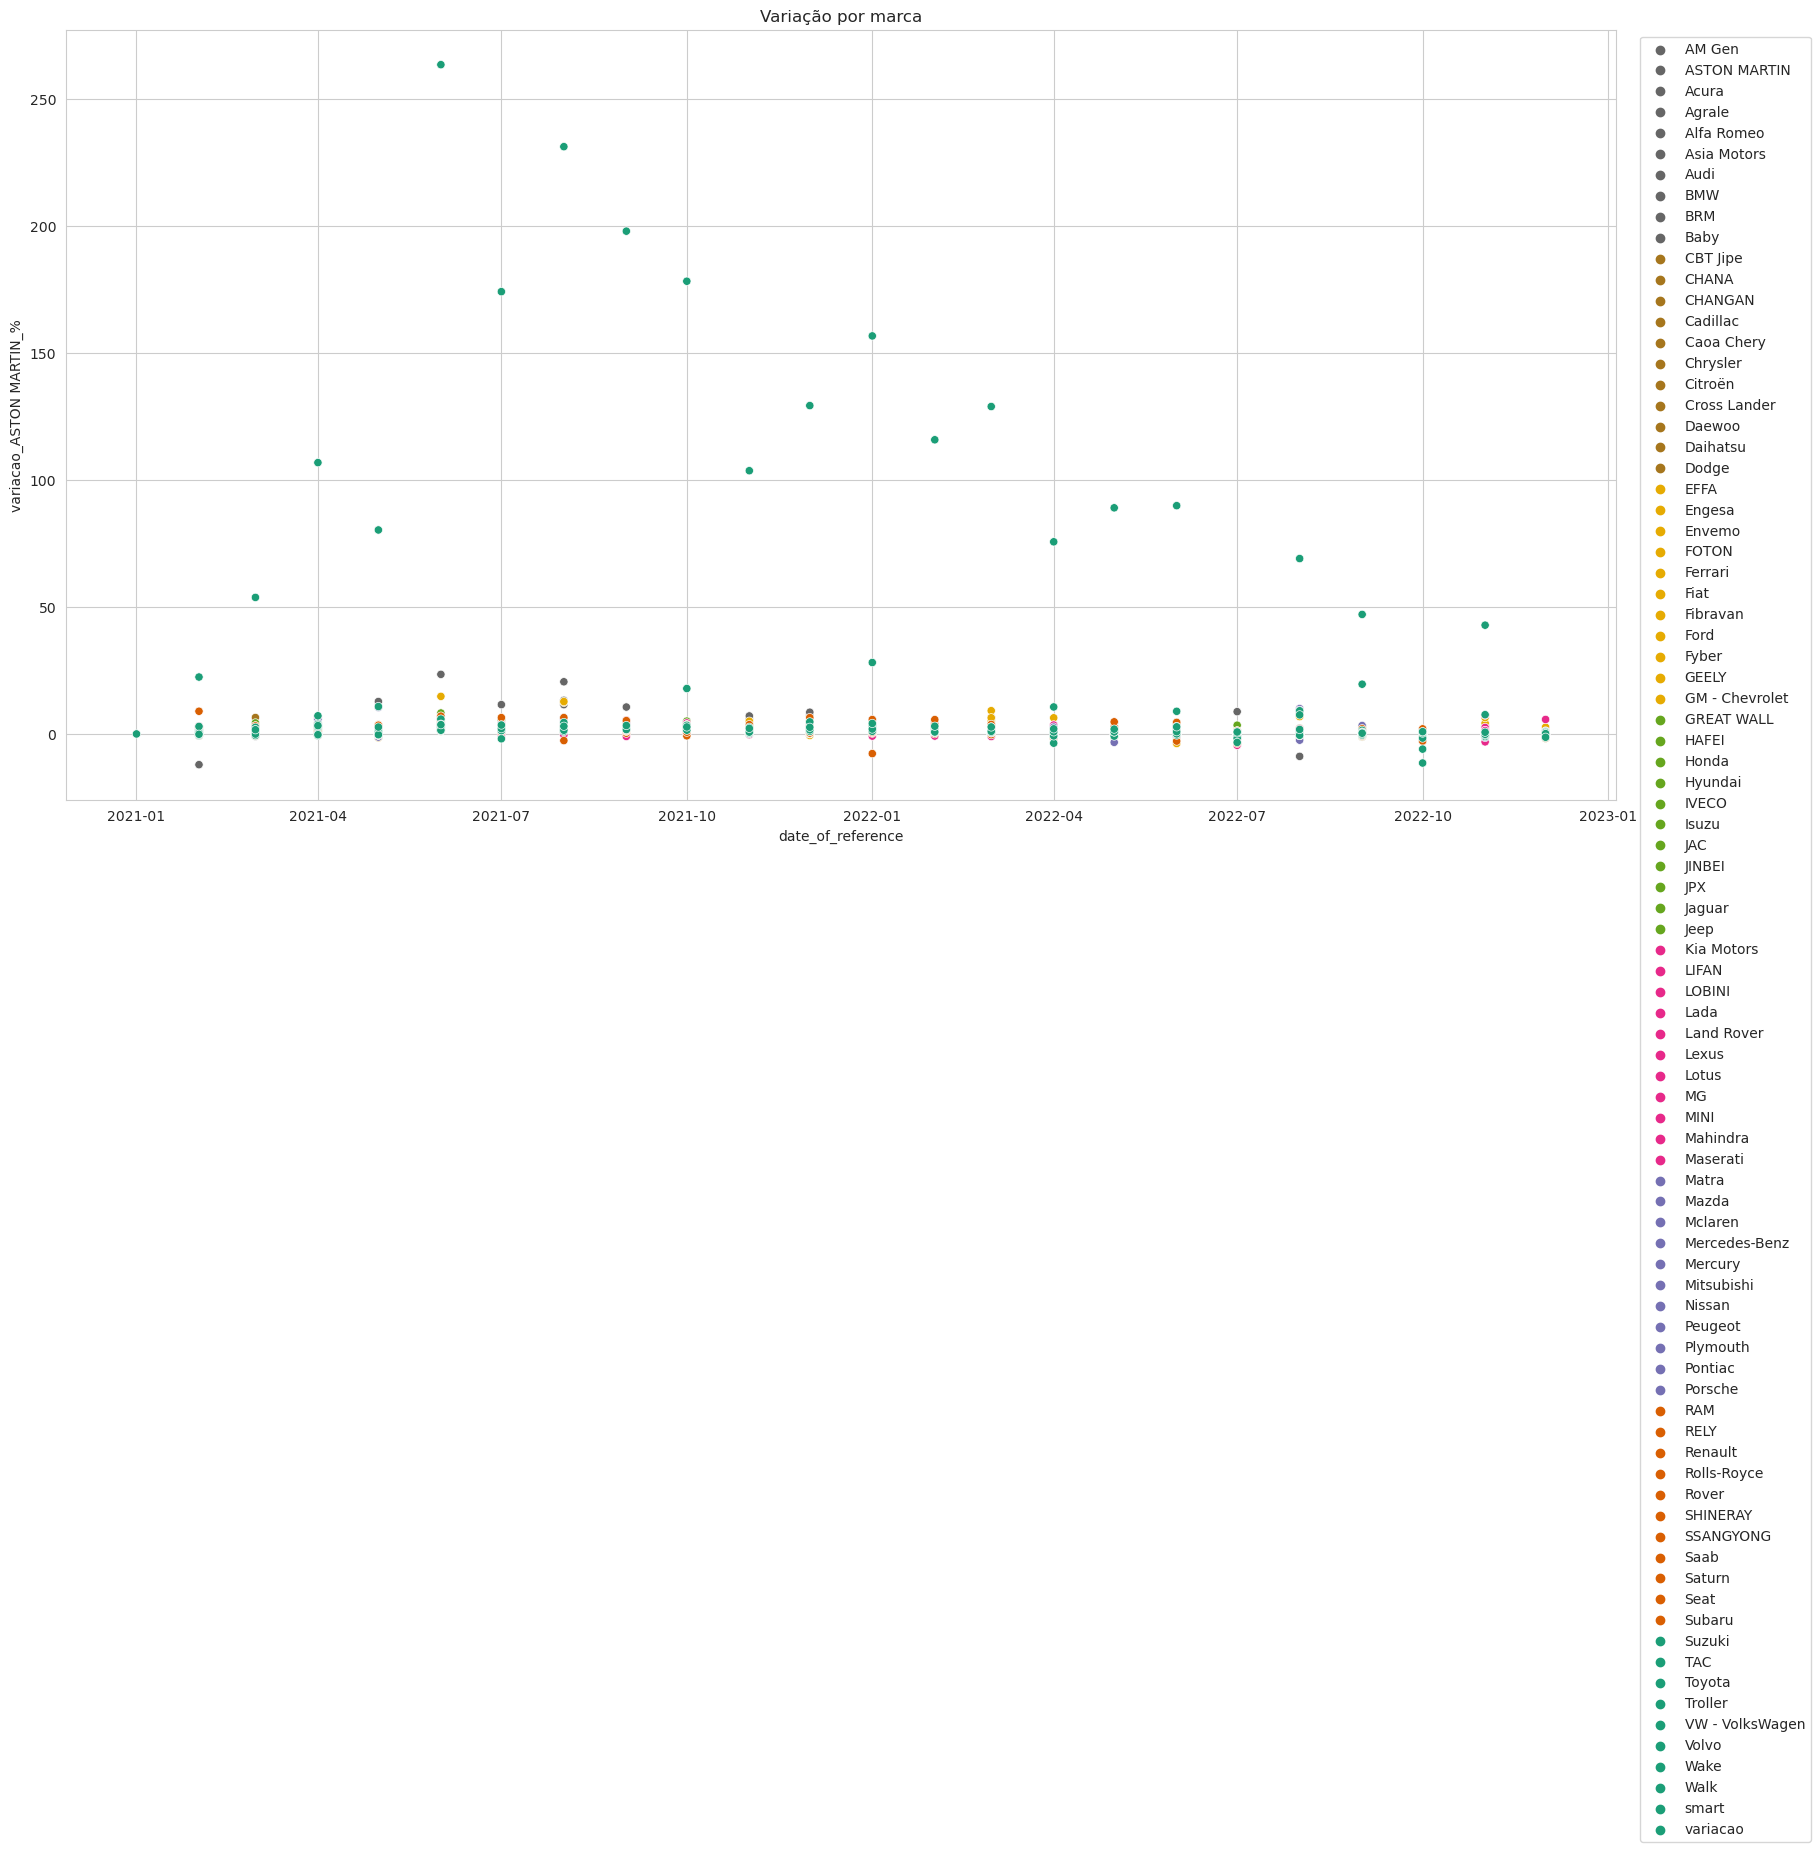

In [70]:
##Configure palette colors https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

plt.figure(figsize=(20,10))
##sns.set_style("whitegrid")
#sns.set_palette("Dark2")
#colors = sns.color_palette("tab10")

#sns.set_palette("Dark2")
sns.set_style("whitegrid")
#sns.set_style('darkgrid')

##sns.color_palette("dark")
p1 = sns.scatterplot(data=full_df, x="date_of_reference", y="Variacao",hue="Brand",palette='Dark2_r') ##,sizes=(100,100) ,legend="brief"
#plt.legend()
#p1.legend(box_to_ancho= (1.2, 1))
plt.legend(loc='upper right',bbox_to_anchor=(1.13,1))
plt.title("Variação por marca")
plt.xlabel("date_of_reference")
plt.ylabel("variacao_ASTON MARTIN_%")

##p1 

